In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from math import sqrt
import math

In [2]:
p=100750
sigmap=10
T=22.8+273
sigmaT=0.1
M=0.029
R=8.31
sigmat=0.1
sigmaV=0.02 #л или дм^3
U01=0.003
U02=0.002
U03=0.004
sigmaU=0.0001
sigmaI=0.01
beta=40.7*10**(-6)

In [3]:
po=(p*M)/(R*T)
sigmapo=po*((sigmap/p)**2+(sigmaT/T)**2)**(1/2)
po, sigmapo

(1.1886222599749885, 0.0004187940932902634)

In [4]:
cpteor=7/2*8.31/0.029
cpteor

1002.9310344827586

In [5]:
izm1=pd.read_csv('izm1.csv')
izm2=pd.read_csv('izm2.csv')
izm3=pd.read_csv('izm3.csv')

Расчёты расхода массы для первого захода

In [6]:
izm1['V/t']=izm1['V']/izm1['t']
izm1['sigmaV/t']=izm1['V/t']*((sigmat/izm1['t'])**2+(sigmaV/izm1['V'])**2)**(1/2)
Vt1=np.mean(izm1['V/t'])
sigmaVt1=(np.mean(izm1['sigmaV/t'])**2+(np.std(izm1['V/t'])/np.sqrt(3-1))**2)**(1/2)
m1=Vt1*po*10**(-3)
sigmam1=m1*((sigmapo/po)**2+(sigmaVt1/Vt1)**2)**(1/2)
sigmam1, m1, sigmaVt1, np.mean(izm1['sigmaV/t']), np.std(izm1['V/t'])/np.sqrt(3-1)
m1, sigmam1

(0.00016507175400455674, 7.088556607978027e-07)

Расчёты расхода массы для второго захода

In [7]:
izm2['V/t']=izm2['V']/izm2['t']
izm2['sigmaV/t']=izm2['V/t']*((sigmat/izm2['t'])**2+(sigmaV/izm2['V'])**2)**(1/2)
Vt2=np.mean(izm2['V/t'])
sigmaVt2=(np.mean(izm2['sigmaV/t'])**2+(np.std(izm2['V/t'])/np.sqrt(3-1))**2)**(1/2)
m2=Vt2*po*10**(-3)
sigmam2=m2*((sigmapo/po)**2+(sigmaVt2/Vt2)**2)**(1/2)
m2, sigmam2

(0.00011936373583231771, 5.460020795569589e-07)

Расчёты расхода массы для третьего захода

In [8]:
izm3['V/t']=izm3['V']/izm3['t']
izm3['sigmaV/t']=izm3['V/t']*((sigmat/izm3['t'])**2+(sigmaV/izm3['V'])**2)**(1/2)
Vt3=np.mean(izm3['V/t'])
sigmaVt3=(np.mean(izm3['sigmaV/t'])**2+(np.std(izm3['V/t'])/np.sqrt(3-1))**2)**(1/2)
m3=Vt3*po*10**(-3)
sigmam3=m3*((sigmapo/po)**2+(sigmaVt3/Vt3)**2)**(1/2)
m3, sigmam3

(7.385885259977521e-05, 3.547703484897988e-07)

In [9]:
izm3

,V,t,V/t,sigmaV/t
0,5,80.31,0.062259,0.000261
1,5,80.25,0.062305,0.000261
2,5,80.84,0.061851,0.000259


In [10]:
nag1=pd.read_csv('nag1.csv')
nag2=pd.read_csv('nag2.csv')
nag3=pd.read_csv('nag3.csv')

Обрабатываем первый подход

In [11]:
nag1['N']=nag1['U1']*nag1['I']*10**(-3)
nag1['sigmaN']=nag1['N']*((sigmaU/nag1['U1'])**2+(sigmaI/nag1['I'])**2)**(1/2)
nag1['dT']=((nag1['U2']-U01)*10**(-3))/beta
nag1['sigmadT']=nag1['dT']*(sigmaU/nag1['U2'])
nag1['sigma']=(nag1['sigmadT']**2+nag1['sigmaN']**2)**(1/2)
sigma1=np.mean(nag1['sigma'])
nag1

,U1,I,U2,N,sigmaN,dT,sigmadT,sigma
0,2.449,68.48,0.040,0.167708,0.000025,0.909091,0.002273,0.002273
1,3.046,85.24,0.054,0.259641,0.000032,1.253071,0.002321,0.002321
2,4.058,113.72,0.095,0.461476,0.000042,2.260442,0.002379,0.002380
3,4.528,127.13,0.120,0.575645,0.000047,2.874693,0.002396,0.002396
4,5.021,140.99,0.150,0.707911,0.000052,3.611794,0.002408,0.002408
5,6.297,176.47,0.236,1.111232,0.000065,5.724816,0.002426,0.002427


Обрабатываем второй подход

In [12]:
nag2['N']=nag2['U1']*nag2['I']*10**(-3)
nag2['sigmaN']=nag2['N']*((sigmaU/nag2['U1'])**2+(sigmaI/nag2['I'])**2)**(1/2)
nag2['dT']=((nag2['U2']-U02)*10**(-3))/beta
nag2['sigmadT']=nag2['dT']*(sigmaU/nag2['U2'])
nag2['sigma']=(nag2['sigmadT']**2+nag2['sigmaN']**2)**(1/2)
sigma2=np.mean(nag2['sigma'])

Обрабатываем третий подход

In [13]:
nag3['N']=nag3['U1']*nag3['I']*10**(-3)
nag3['sigmaN']=nag3['N']*((sigmaU/nag3['U1'])**2+(sigmaI/nag3['I'])**2)**(1/2)
nag3['dT']=((nag3['U2']-U03)*10**(-3))/beta
nag3['sigmadT']=nag3['dT']*(sigmaU/nag3['U2'])
nag3['sigma']=(nag3['sigmadT']**2+nag3['sigmaN']**2)**(1/2)
sigma3=np.mean(nag3['sigma'])
nag3

,U1,I,U2,N,sigmaN,dT,sigmadT,sigma
0,2.565,71.91,0.070,0.184449,0.000027,1.621622,0.002317,0.002317
1,3.013,84.51,0.104,0.254629,0.000031,2.457002,0.002363,0.002363
2,3.550,99.56,0.147,0.353438,0.000037,3.513514,0.002390,0.002390
3,3.995,112.10,0.189,0.447840,0.000041,4.545455,0.002405,0.002405
4,4.563,128.06,0.249,0.584338,0.000047,6.019656,0.002418,0.002418
5,5.015,140.74,0.301,0.705811,0.000052,7.297297,0.002424,0.002425
6,6.327,177.44,0.476,1.122663,0.000066,11.597052,0.002436,0.002437


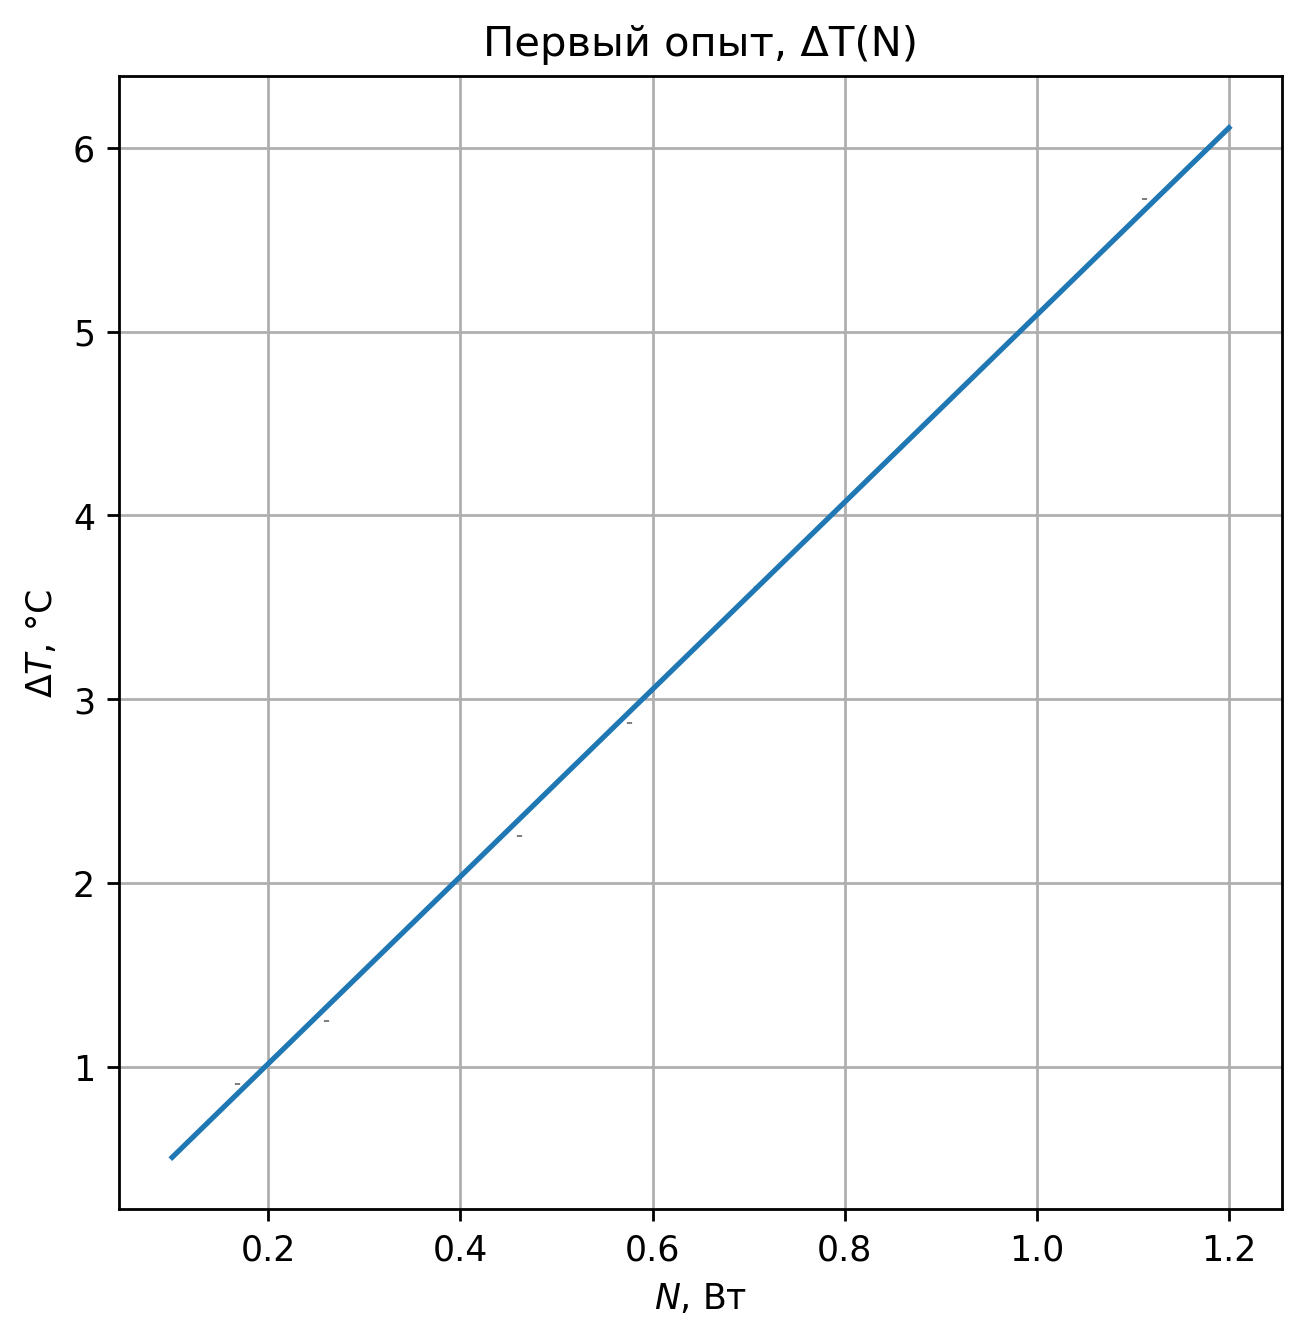

In [14]:
x=[0.1,1.2]
y=[]
for i in range (2):
    y.append(x[i]*5.090485284877631)
plt.figure(figsize=(6,6), dpi=250)
plt.ylabel("$ΔT$, °C")
plt.xlabel("$N$, Вт")
plt.title('Первый опыт, ΔT(N)')
plt.grid(True, linestyle="-")
plt.errorbar(nag1['N'], nag1['dT'], xerr=nag1['sigmaN'], yerr=nag1['sigmadT'], color='black',fmt='none' )
plt.plot(x, y)
plt.savefig('Первый опыт.jpeg')
plt.show()

In [15]:
mN=np.mean(nag1['N'])
mdT=np.mean(nag1['dT'])
mNdT=np.mean(nag1['N']*nag1['dT'])
mN2=np.mean((nag1['N'])**2)
mdT2=np.mean(nag1['dT']**2)
k1=mNdT/mN2
np.polyfit(nag1['N'], nag1['dT'],1)
sigmak11=(1/np.sqrt(7))*((mdT2/mN2)-k1**2)**(1/2)
sigmak1=(sigmak11**2+sigma1**2)**(1/2)
mN, mdT, mNdT, mN2, k1, sigmak11, sigmak1
nag1


,U1,I,U2,N,sigmaN,dT,sigmadT,sigma
0,2.449,68.48,0.040,0.167708,0.000025,0.909091,0.002273,0.002273
1,3.046,85.24,0.054,0.259641,0.000032,1.253071,0.002321,0.002321
2,4.058,113.72,0.095,0.461476,0.000042,2.260442,0.002379,0.002380
3,4.528,127.13,0.120,0.575645,0.000047,2.874693,0.002396,0.002396
4,5.021,140.99,0.150,0.707911,0.000052,3.611794,0.002408,0.002408
5,6.297,176.47,0.236,1.111232,0.000065,5.724816,0.002426,0.002427


In [16]:
np.polyfit(nag1['N'], nag1['dT'],1)

array([ 5.16732365, -0.05559598])

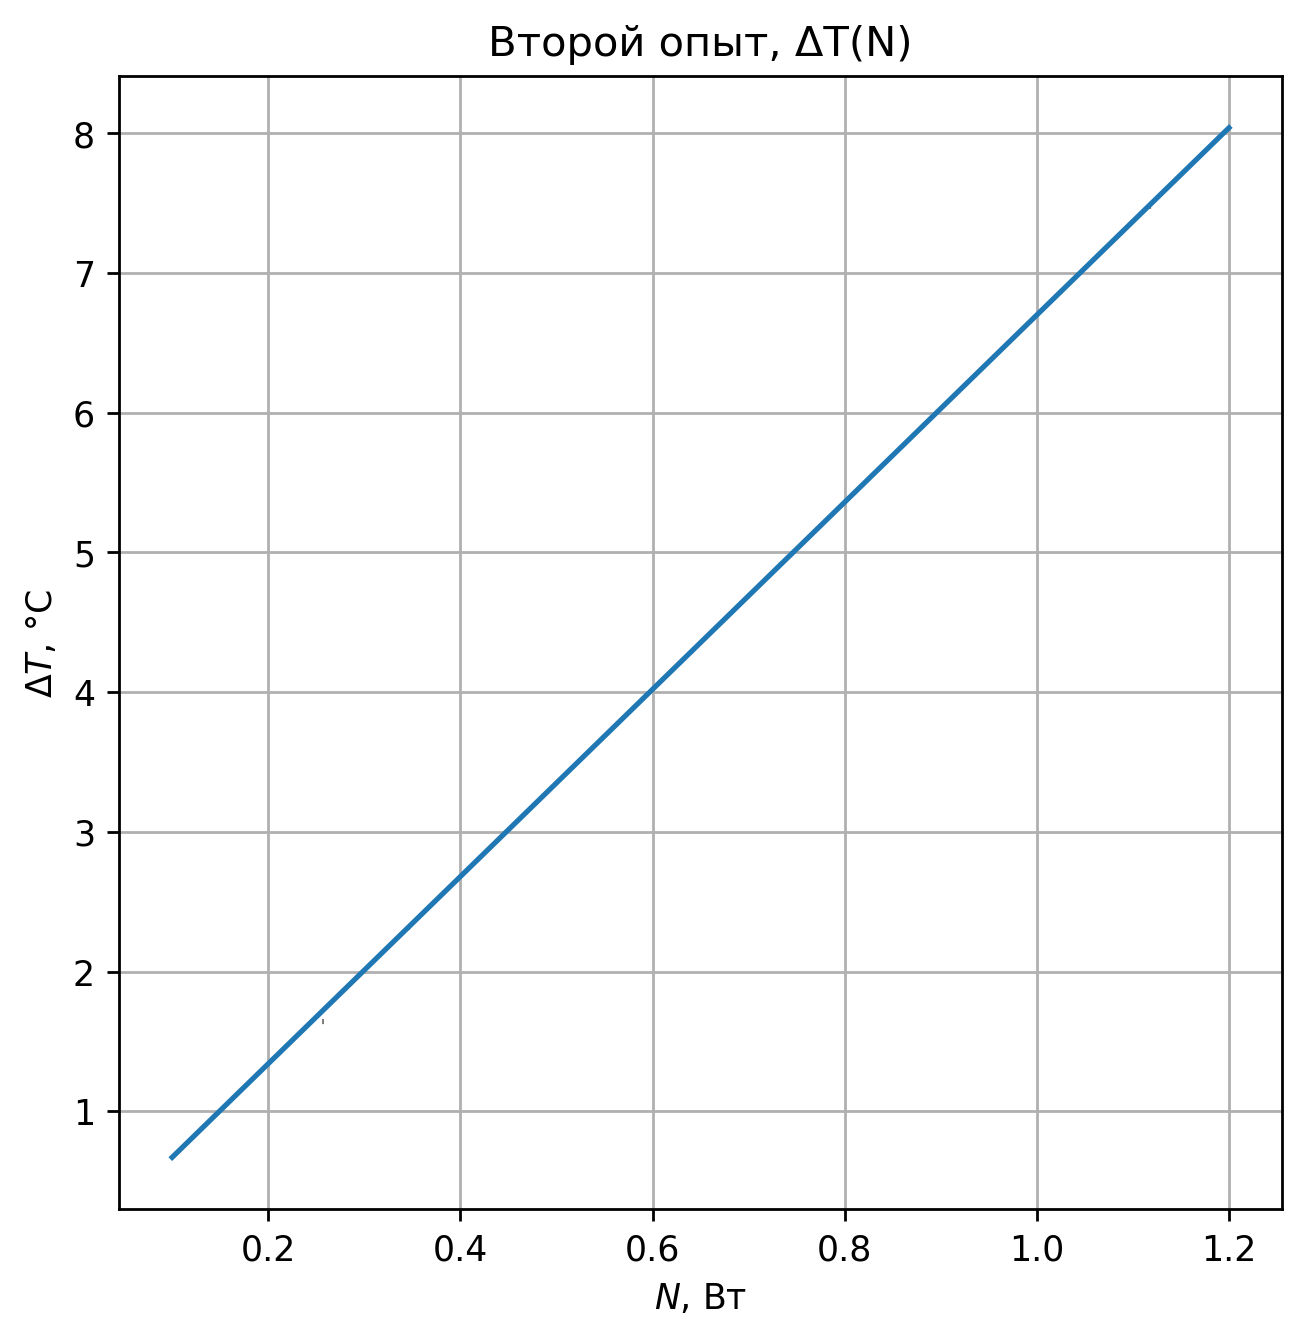

In [17]:
x=[0.1,1.2]
y=[]
for i in range (2):
    y.append(x[i]*6.700273808431262)
plt.figure(figsize=(6,6), dpi=250)
plt.ylabel("$ΔT$, °C")
plt.xlabel("$N$, Вт")
plt.title('Второй опыт, ΔT(N)')
plt.grid(True, linestyle="-")
plt.errorbar(nag2['N'], nag2['dT'], xerr=nag2['sigmaN'], yerr=nag2['sigmadT'], color='black', linestyle='' )
plt.plot(x,y)
plt.savefig('Второй опыт')
plt.show()

In [18]:
mN=np.mean(nag2['N'])
mdT=np.mean(nag2['dT'])
mNdT=np.mean(nag2['N']*nag2['dT'])
mN2=np.mean((nag2['N'])**2)
mdT2=np.mean(nag2['dT']**2)
k2=mNdT/mN2
np.polyfit(nag2['N'], nag2['dT'],1)
sigmak22=(1/np.sqrt(7))*((mdT2/mN2)-k2**2)**(1/2)
sigmak2=(sigmak22**2+sigma2**2)**(1/2)
k2, sigmak2, sigmak22, sigma2, mdT2, mN2

(6.700273808431262,
 0.042032305797090254,
 0.041963222153960464,
 0.00240888295221424,
 16.120833811251504,
 0.3589906789641789)

In [19]:
np.polyfit(nag2['N'], nag2['dT'],1)

array([ 6.82588424, -0.08659483])

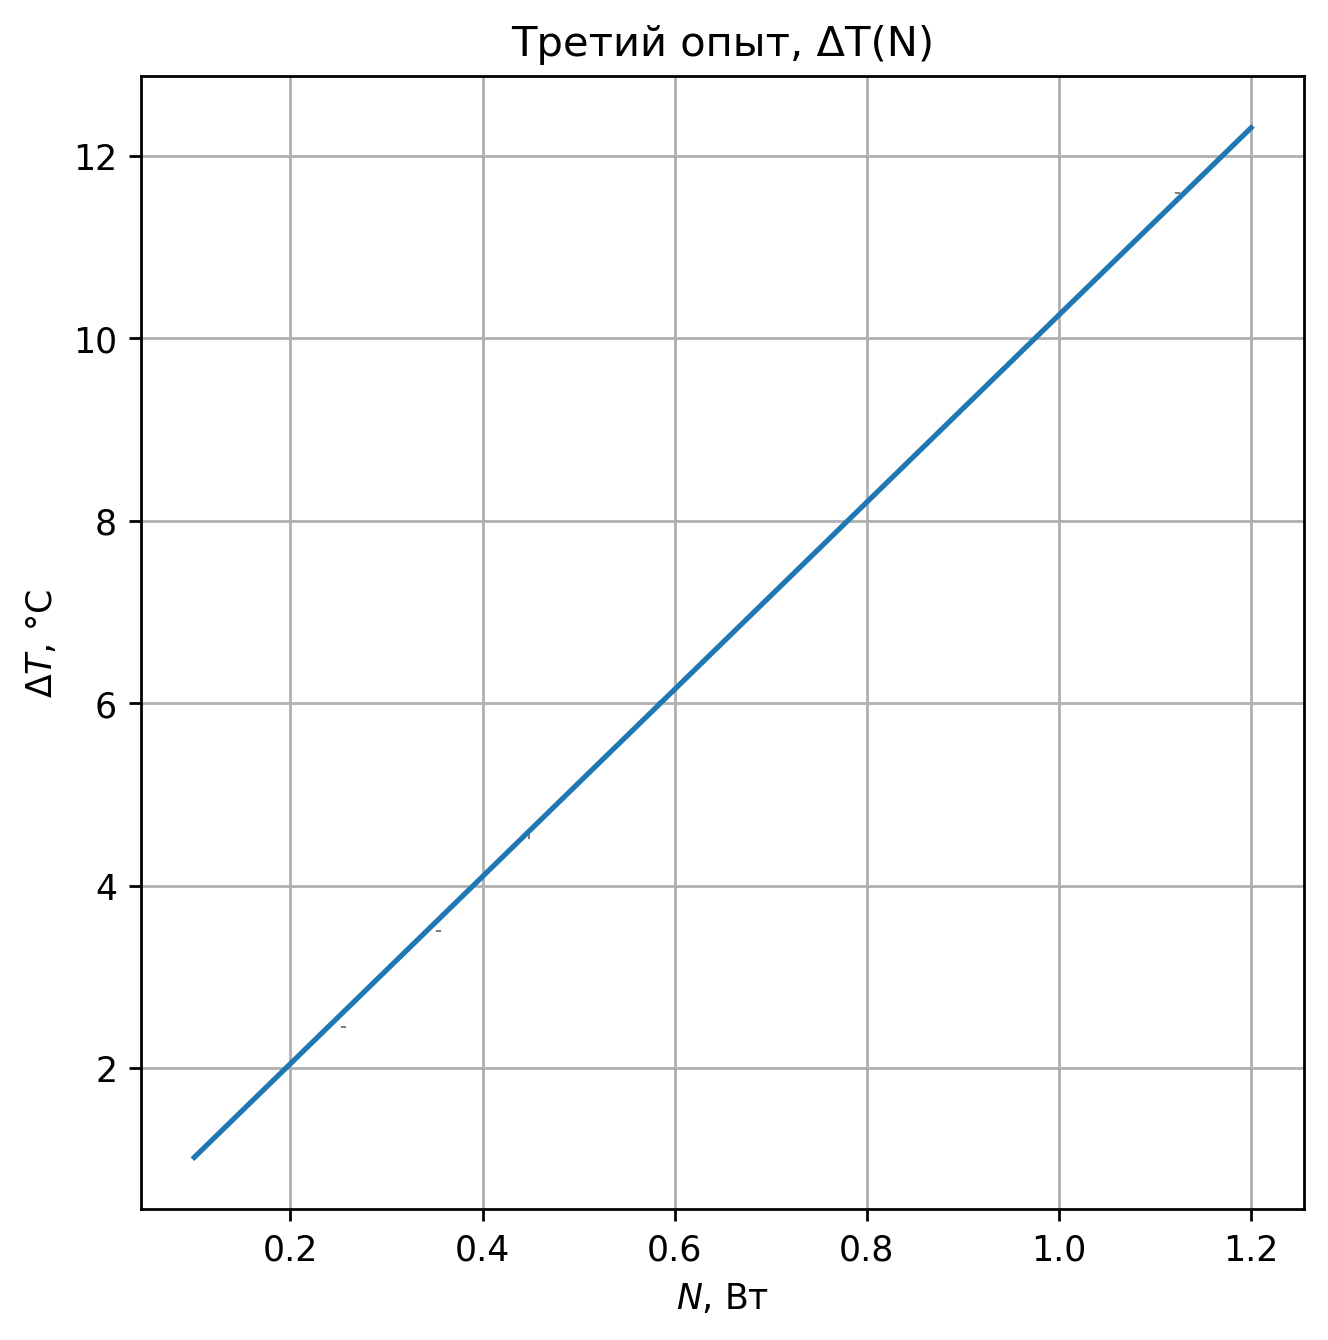

In [20]:
x=[0.1,1.2]
y=[]
for i in range (2):
    y.append(x[i]*10.256108110792061)
plt.figure(figsize=(6,6), dpi=250)
plt.ylabel("$ΔT$, °C")
plt.xlabel("$N$, Вт")
plt.title('Третий опыт, ΔT(N)')
plt.grid(True, linestyle="-")
plt.errorbar(nag3['N'], nag3['dT'], xerr=nag3['sigmaN'], yerr=nag3['sigmadT'], color='black', linestyle='' )
plt.plot(x,y)
plt.savefig('Третий опыт')
plt.show()

In [21]:
mN=np.mean(nag3['N'])
mdT=np.mean(nag3['dT'])
mNdT=np.mean(nag3['N']*nag3['dT'])
mN2=np.mean((nag3['N'])**2)
mdT2=np.mean(nag3['dT']**2)
k3=mNdT/mN2
np.polyfit(nag3['N'], nag3['dT'],1)
sigmak33=(1/np.sqrt(7))*((mdT2/mN2)-k3**2)**(1/2)
sigmak3=(sigmak33**2+sigma3**2)**(1/2)
k3, sigmak3, mdT

(10.256108110792061, 0.08329559590442494, 5.2930852930852925)

In [22]:
np.polyfit(nag3['N'], nag3['dT'],1)

array([10.607244  , -0.24263387])

In [23]:
k=[]
sigmak=[]
sigmak.append((1/k1)*(sigmak1/k1))
sigmak.append((1/k2)*(sigmak2/k2))
sigmak.append((1/k3)*(sigmak3/k3))
m=[]
sigmam=[]
k.append(1/k1)
k.append(1/k2)
k.append(1/k3)
m.append(m1)
m.append(m2)
m.append(m3)
sigmam.append(sigmam1)
sigmam.append(sigmam2)
sigmam.append(sigmam3)
k, sigmak, m, sigmam

([0.19644492499972696, 0.14924763205074607, 0.09750287235640029],
 [0.0014517199013394978, 0.0009362635452232838, 0.0007918754139080764],
 [0.00016507175400455674, 0.00011936373583231771, 7.385885259977521e-05],
 [7.088556607978027e-07, 5.460020795569589e-07, 3.547703484897988e-07])

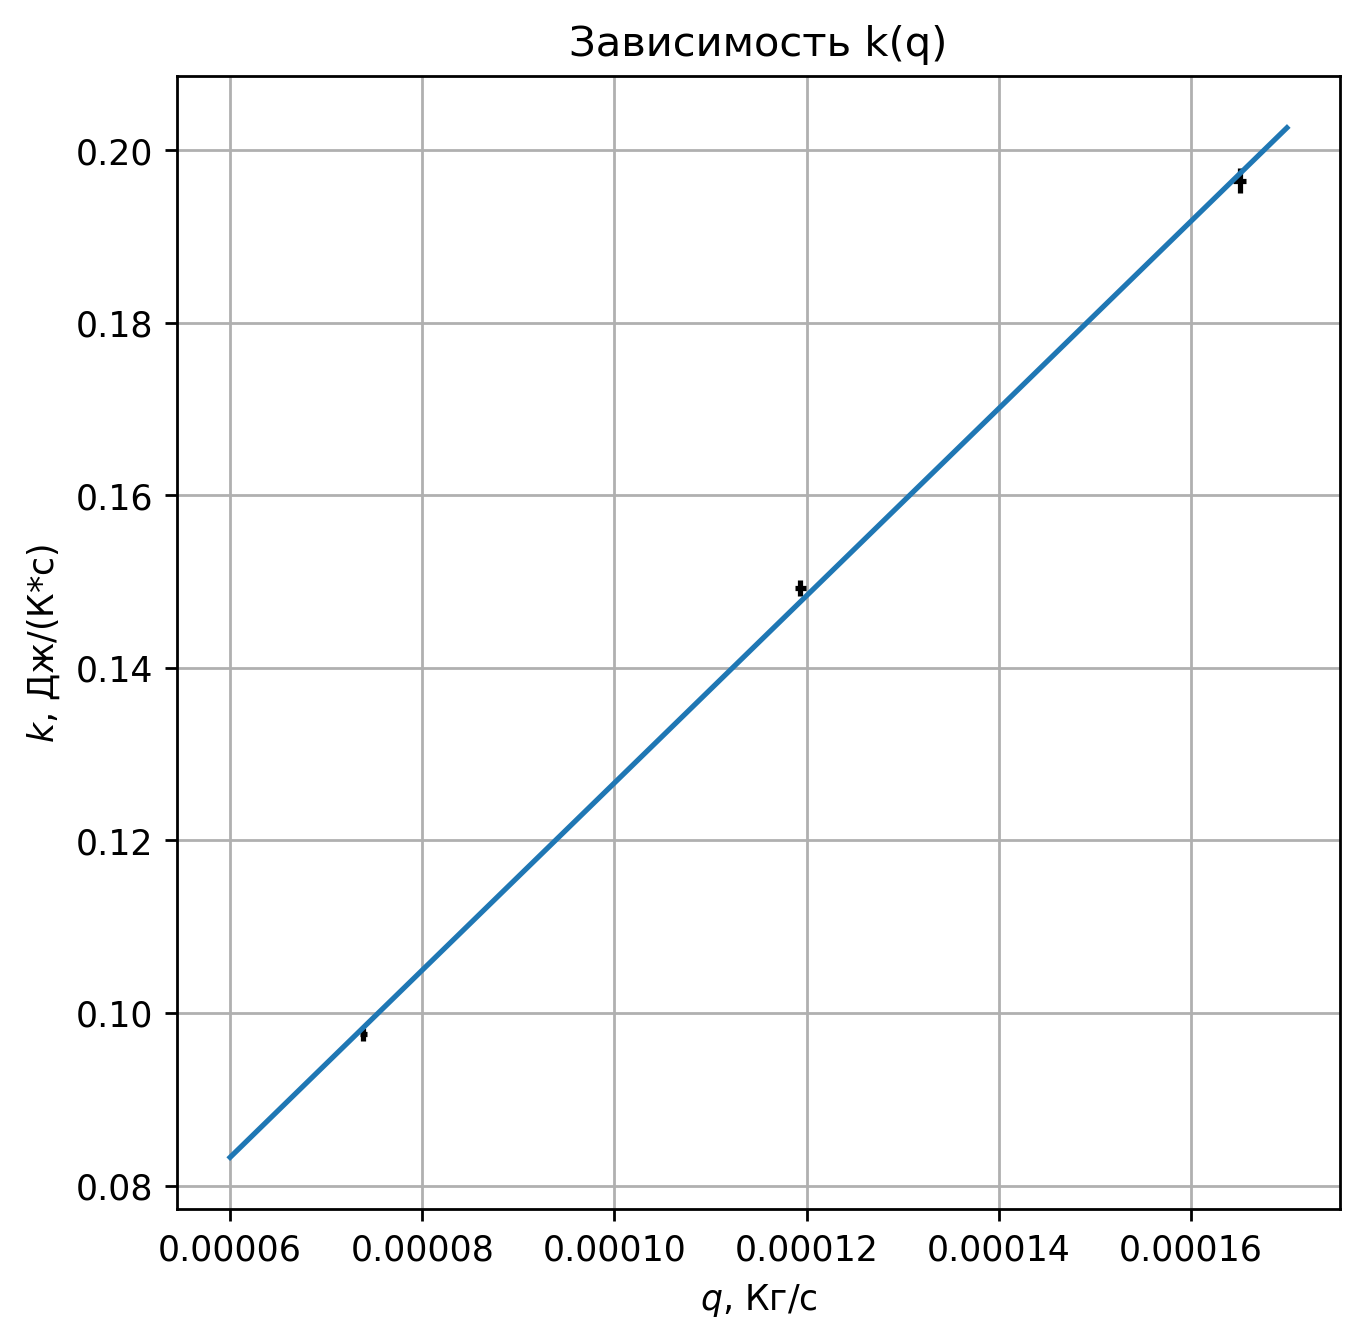

In [24]:
x=[0.00006,0.00017]
y=[]
for i in range (2):
    y.append(x[i]*1.08469867e+03 + 1.81846770e-02)
plt.figure(figsize=(6,6), dpi=250)
plt.ylabel("$k$, Дж/(К*с)")
plt.xlabel("$q$, Кг/с")
plt.title('Зависимость k(q)')
plt.grid(True, linestyle="-")
plt.errorbar(m, k, xerr=sigmam, yerr=sigmak, color='black', linestyle='' )
plt.plot(x,y)
plt.savefig('k(q).jpeg')
plt.show()

In [25]:
np.polyfit(m,k,1)


array([1.08469867e+03, 1.81846770e-02])

In [26]:
meanm=np.mean(m)
meank=np.mean(k)
mk=[]
m22=[]
k2=[]
for i in range (len(m)):
    mk.append(m[i]*k[i])
    m22.append(m[i]**2)
    k2.append(k[i]**2)
meanmk=np.mean(mk)
meanm22=np.mean(m22)
meank2=np.mean(k2)
cp=(meanmk-meanm*meank)/(meanm22-meanm**2)
alp=meank-cp*meanm
sigmacp=np.sqrt(1/3)*np.sqrt((meank2-meank**2)/(meanm22-meanm**2)-cp**2)
sigmacp=sigmacp*0+9.67634
sigmaalp=sigmacp*np.sqrt(meanm22-meanm**2)
sigmacp, cp, alp, sigmaalp

(9.67634, 1084.6986747618535, 0.01818467699705656, 0.000360323115685267)

In [27]:
sigmacp/cp*100, sigmaalp/alp*100

(0.8920763180728002, 1.9814655808491417)

In [28]:
np.polyfit(m,k,1)

array([1.08469867e+03, 1.81846770e-02])

In [29]:
nag1['Np']=nag1['N']-cp*m1*nag1['dT']
Np1=np.mean(nag1['Np'])
nag2['Np']=nag2['N']-cp*m2*nag2['dT']
Np2=np.mean(nag2['Np'])
nag3['Np']=nag3['N']-cp*m3*nag3['dT']
Np3=np.mean(nag3['Np'])
Np=(Np1+Np2+Np3)/3
nag3

,U1,I,U2,N,sigmaN,dT,sigmadT,sigma,Np
0,2.565,71.91,0.070,0.184449,0.000027,1.621622,0.002317,0.002317,0.054534
1,3.013,84.51,0.104,0.254629,0.000031,2.457002,0.002363,0.002363,0.057787
2,3.550,99.56,0.147,0.353438,0.000037,3.513514,0.002390,0.002390,0.071954
3,3.995,112.10,0.189,0.447840,0.000041,4.545455,0.002405,0.002405,0.083682
4,4.563,128.06,0.249,0.584338,0.000047,6.019656,0.002418,0.002418,0.102075
5,5.015,140.74,0.301,0.705811,0.000052,7.297297,0.002424,0.002425,0.121191
6,6.327,177.44,0.476,1.122663,0.000066,11.597052,0.002436,0.002437,0.193570


In [30]:
cp/cpteor

1.081528676915721